In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 


In [2]:
df=pd.read_csv('gold-dataset.csv')

In [3]:
df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0.0,0.0,1.0,0.0,1.0,0.0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0.0,0.0,1.0,0.0,1.0,0.0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1.0,0.0,0.0,0.0,1.0,0.0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0.0,0.0,0.0,0.0,0.0,1.0,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0.0,0.0,1.0,0.0,1.0,0.0,negative


In [4]:
df = df.rename(columns={"Price Sentiment":"Price_Sentiment",})

In [5]:
df.shape

(5691, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5691 entries, 0 to 5690
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dates                     5691 non-null   object 
 1   URL                       5691 non-null   object 
 2   News                      5690 non-null   object 
 3   Price Direction Up        5690 non-null   float64
 4   Price Direction Constant  5690 non-null   float64
 5   Price Direction Down      5690 non-null   float64
 6   Asset Comparision         5690 non-null   float64
 7   Past Information          5690 non-null   float64
 8   Future Information        5690 non-null   float64
 9   Price_Sentiment           5690 non-null   object 
dtypes: float64(6), object(4)
memory usage: 444.7+ KB


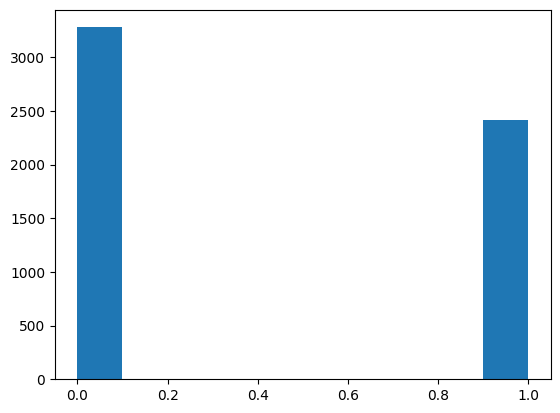

In [7]:
plt.hist(df['Price Direction Up'])
plt.show()

(-1.1887766427525082,
 1.2083384844105716,
 -1.168109086024178,
 1.2050168228524898)

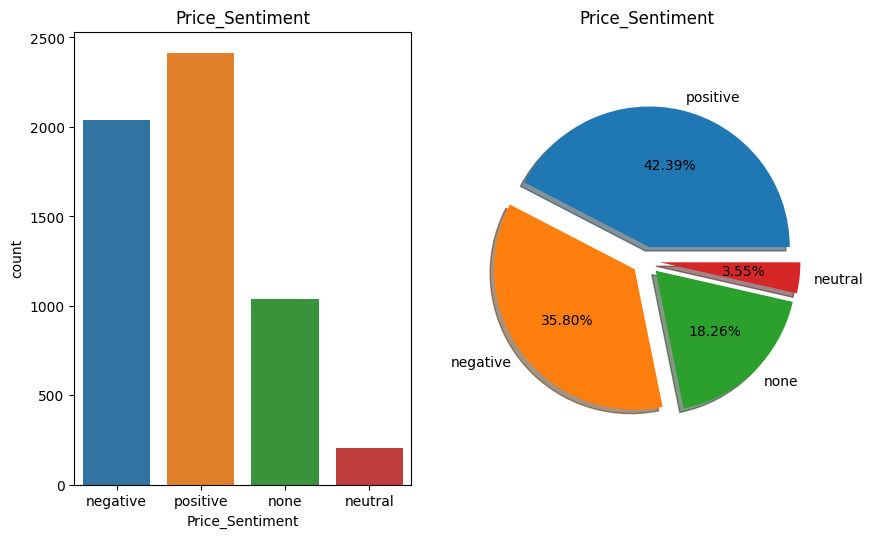

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(3,4,1)
sns.countplot(df,x='Price_Sentiment')
plt.title('Price_Sentiment') 
plt.subplot(3,4,2)
Price_Sentiment = df.Price_Sentiment.value_counts()
plt.pie(Price_Sentiment,explode=[0.1,0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Price_Sentiment.index)
plt.title('Price_Sentiment')
plt.axis('equal')

In [9]:
df = df[df["Price_Sentiment"] != 'none']

In [10]:
df['Price_Sentiment'].value_counts()

positive    2412
negative    2037
neutral      202
Name: Price_Sentiment, dtype: int64

In [11]:
df['label_num'] = df['Price_Sentiment'].map({'neutral' : 0, 'negative': 1, 'positive': 2})

In [12]:
df.head(5)


,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price_Sentiment,label_num
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0.0,0.0,1.0,0.0,1.0,0.0,negative,1.0
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0.0,0.0,1.0,0.0,1.0,0.0,negative,1.0
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1.0,0.0,0.0,0.0,1.0,0.0,positive,2.0
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0.0,0.0,1.0,0.0,1.0,0.0,negative,1.0
5,16-08-2016,http://www.marketwatch.com/story/dec-gold-clim...,"Dec. gold climbs $9.40, or 0.7%, to settle at ...",1.0,0.0,0.0,0.0,1.0,0.0,positive,2.0


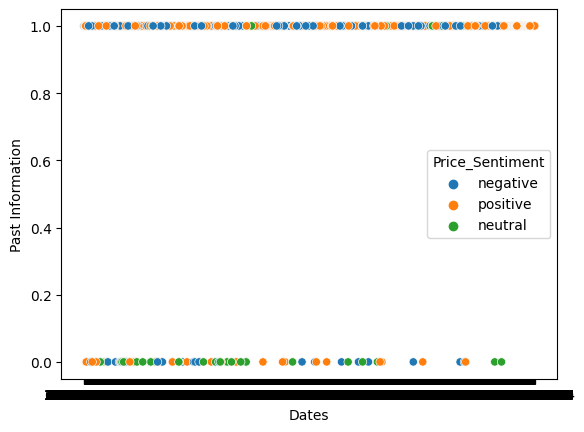

In [19]:
sns.scatterplot(x='Dates',y='Past Information',hue='Price_Sentiment',data=df)
plt.show()

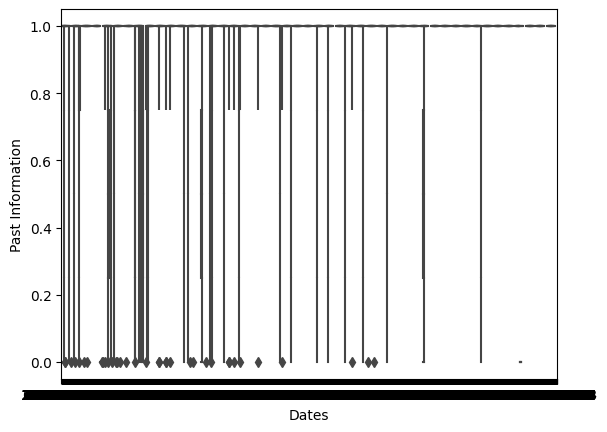

In [20]:
sns.boxplot(x='Dates',y='Past Information',data=df)
plt.show()

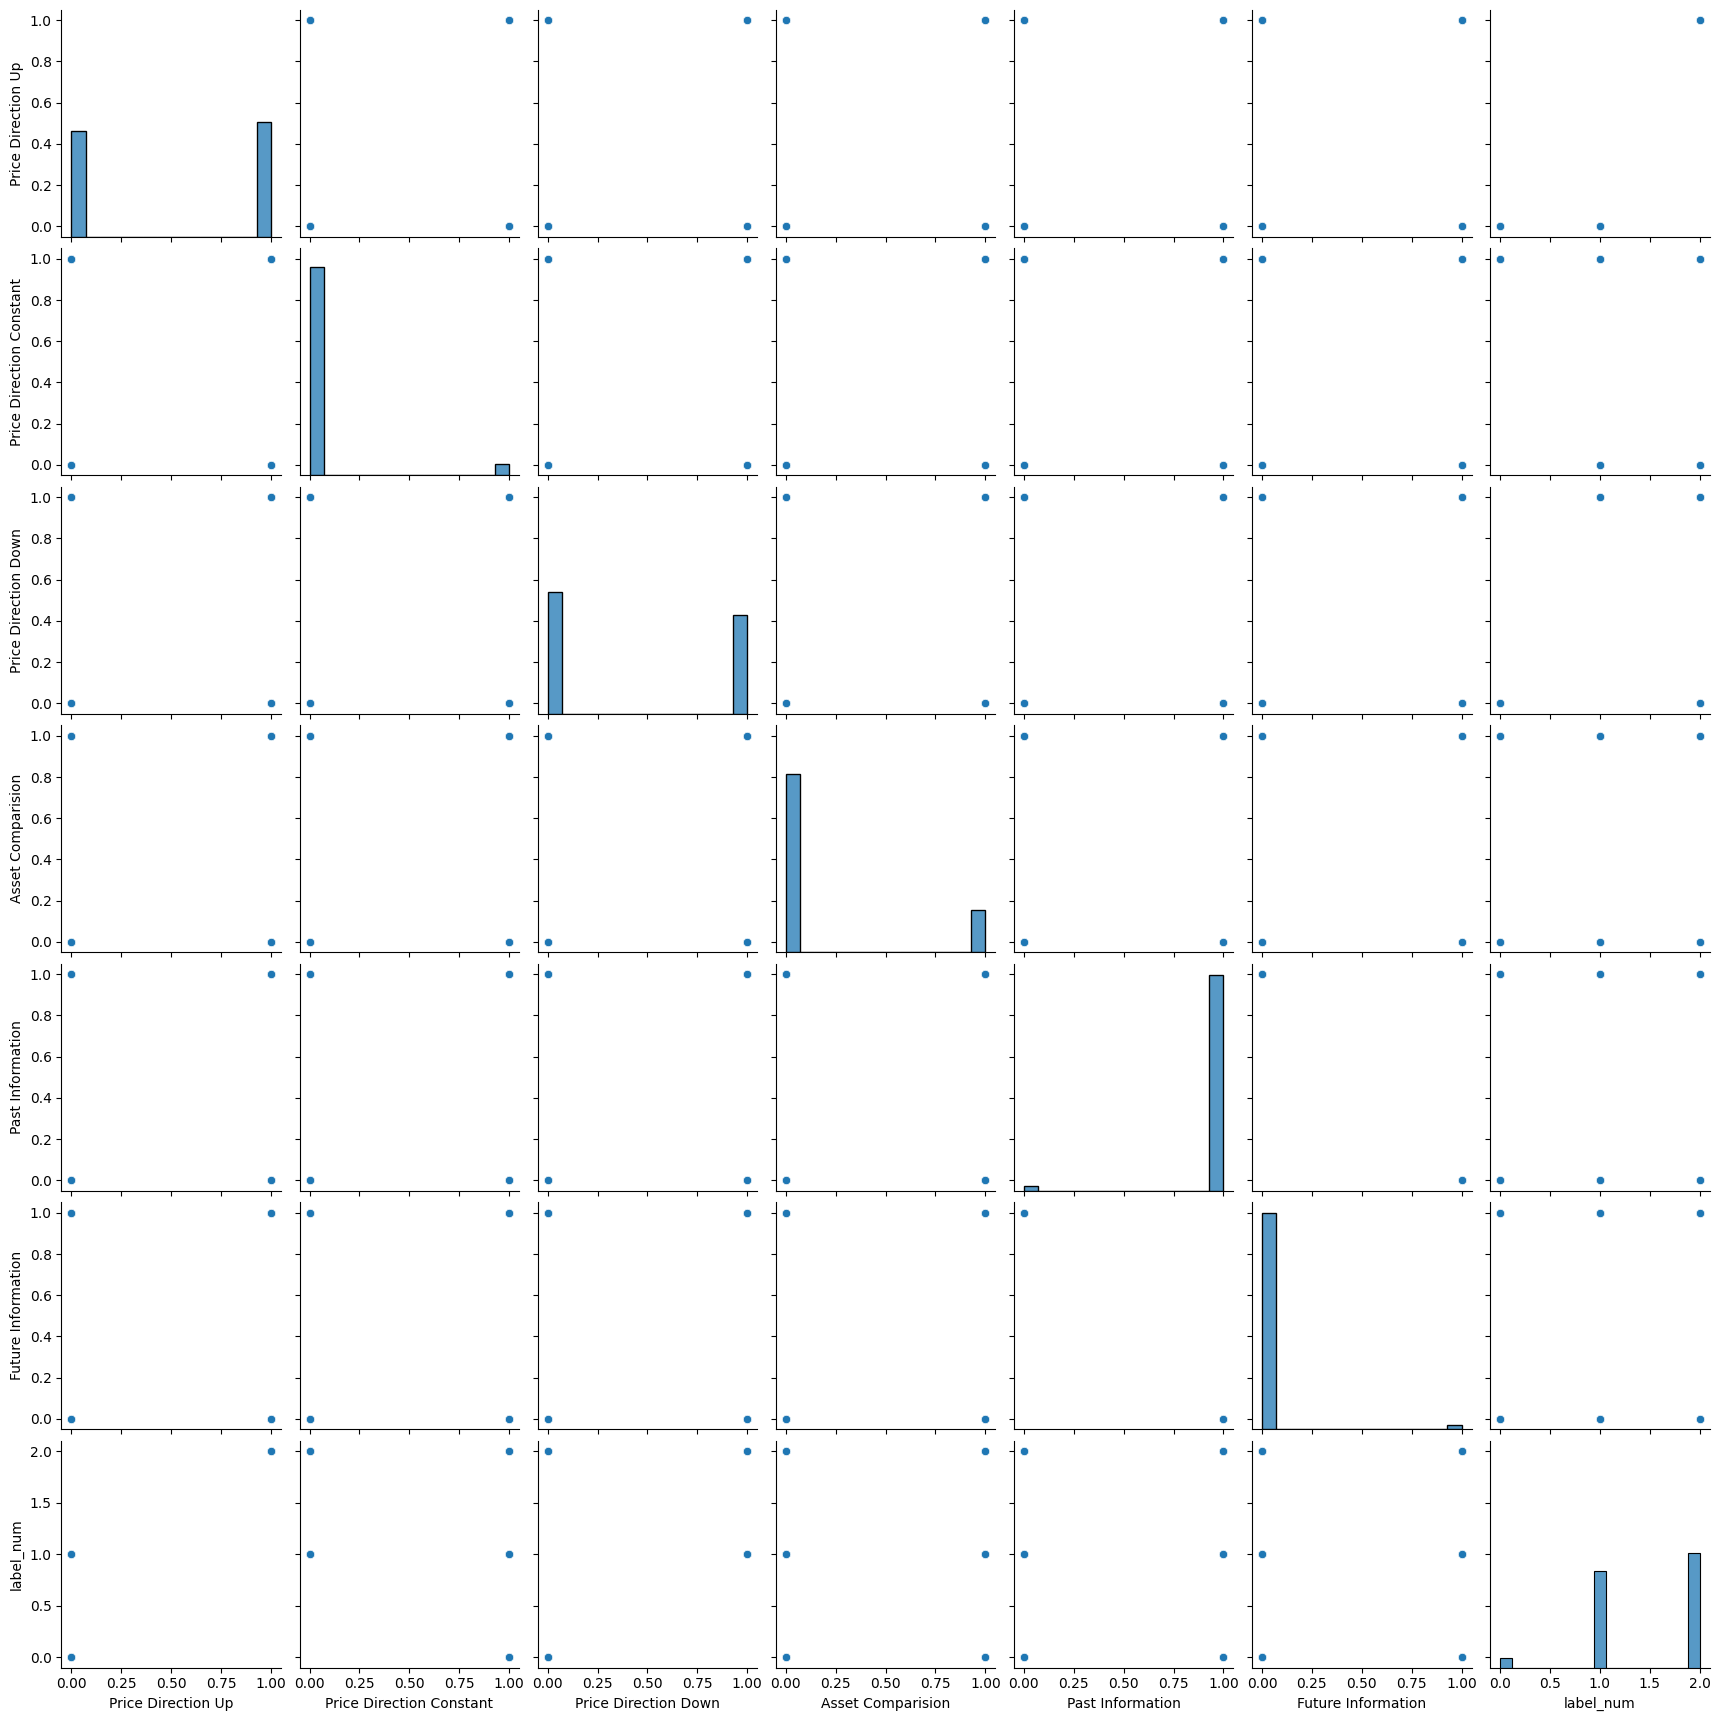

In [24]:
sns.pairplot(df)

In [25]:
df.describe()

,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,label_num
count,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000
mean,0.518598,0.052247,0.449151,0.191142,0.981079,0.018921,1.475167
std,0.499708,0.222548,0.497461,0.393243,0.136260,0.136260,0.579930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [26]:
print(df.isnull().sum())

Dates                       0
URL                         0
News                        1
Price Direction Up          1
Price Direction Constant    1
Price Direction Down        1
Asset Comparision           1
Past Information            1
Future Information          1
Price_Sentiment             1
label_num                   1
dtype: int64


Deleting the row with missing data

In [21]:
updated_df = df.dropna(axis=0)

In [22]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4651 entries, 0 to 5689
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dates                     4651 non-null   object 
 1   URL                       4651 non-null   object 
 2   News                      4651 non-null   object 
 3   Price Direction Up        4651 non-null   float64
 4   Price Direction Constant  4651 non-null   float64
 5   Price Direction Down      4651 non-null   float64
 6   Asset Comparision         4651 non-null   float64
 7   Past Information          4651 non-null   float64
 8   Future Information        4651 non-null   float64
 9   Price_Sentiment           4651 non-null   object 
 10  label_num                 4651 non-null   float64
dtypes: float64(7), object(4)
memory usage: 436.0+ KB
